# Plot the results of the experiments

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from glob import glob 
from pathlib import Path 
from fastcore.xtras import load_pickle

import pandas as pd

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

from gptchem.settings import TWO_COL_GOLDEN_RATIO_HEIGHT_INCH, TWO_COL_WIDTH_INCH
from gptchem.data import get_photoswitch_data
from gptchem.formatter import ClassificationFormatter
from gptchem.evaluator import evaluate_classification
from gptchem.baselines.photoswitch import train_test_photoswitch_classification_baseline
import matplotx
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use(['science', 'nature'])

%matplotlib inline

In [2]:
data = get_photoswitch_data()
formatter = ClassificationFormatter(
        representation_column="SMILES",
        label_column="E isomer pi-pi* wavelength in nm",
        property_name="transition wavelength",
        num_classes=2,
        qcut=True,
    )

formatted = formatter(data)

dummy_results = []
for i in range(10): 
    for train_size in [10, 50, 200]:
        train, test = train_test_split(formatted, train_size=train_size, test_size=100, stratify=formatted["label"], random_state=i + 10)
        dummy = DummyClassifier(strategy="uniform")
        dummy.fit(train["representation"], train["label"])
        predictions = dummy.predict(test["representation"])
        metrics = evaluate_classification(test["label"], predictions)
        dummy_results.append({
            "train_size": train_size,
            **metrics,
        })


In [3]:
dummy_results = pd.DataFrame(dummy_results)

In [4]:
dummy_results

,train_size,accuracy,acc_macro,racc,kappa,confusion_matrix,f1_macro,f1_micro,frac_valid,all_y_true,all_y_pred,valid_indices,might_have_rounded_floats
0,10,0.50,0.50,0.5,0.00,"((0, {0: 23, 1: 27}), (1, {0: 23, 1: 27}))",0.499199,0.50,1.0,"[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
1,50,0.48,0.48,0.5,-0.04,"((0, {0: 24, 1: 26}), (1, {0: 26, 1: 24}))",0.480000,0.48,1.0,"[0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
2,200,0.50,0.50,0.5,0.00,"((0, {0: 24, 1: 26}), (1, {0: 24, 1: 26}))",0.499800,0.50,1.0,"[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
3,10,0.47,0.47,0.5,-0.06,"((0, {0: 24, 1: 26}), (1, {0: 27, 1: 23}))",0.469947,0.47,1.0,"[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
4,50,0.57,0.57,0.5,0.14,"((0, {0: 31, 1: 19}), (1, {0: 24, 1: 26}))",0.568922,0.57,1.0,"[0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
5,200,0.47,0.47,0.5,-0.06,"((0, {0: 28, 1: 22}), (1, {0: 31, 1: 19}))",0.465672,0.47,1.0,"[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, ...","[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
6,10,0.47,0.47,0.5,-0.06,"((0, {0: 25, 1: 25}), (1, {0: 28, 1: 22}))",0.469523,0.47,1.0,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, ...","[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
7,50,0.53,0.53,0.5,0.06,"((0, {0: 26, 1: 24}), (1, {0: 23, 1: 27}))",0.529953,0.53,1.0,"[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
8,200,0.50,0.50,0.5,0.00,"((0, {0: 23, 1: 27}), (1, {0: 23, 1: 27}))",0.499199,0.50,1.0,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, ...","[1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False
9,10,0.51,0.51,0.5,0.02,"((0, {0: 26, 1: 24}), (1, {0: 25, 1: 25}))",0.509951,0.51,1.0,"[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, ...","[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False


## Baselines

In [5]:
gpr_baselines = []

for i in range(10):
    for train_size in [10, 50, 100, 200]:
        res = train_test_photoswitch_classification_baseline(
            data,
            train_size=train_size,
            test_size=100,
            formatter=formatter,
            seed=i
        )
        res['train_size'] = train_size
        gpr_baselines.append(res)

2023-01-14 16:46:50.147778: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.mean_function.c     │ Parameter │ Identity         │         │ True        │ ()      │ float64 │ 0.15221 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 3.78032 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 0.28128 │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

In [6]:
gpr_res = pd.DataFrame(gpr_baselines)

In [7]:
gpr_baseline = gpr_res[['train_size', 'accuracy', 'f1_micro', 'f1_macro', 'kappa']].groupby('train_size').agg(('mean', 'std'))

In [12]:
gpr_baseline

accuracy           f1_micro            f1_macro            kappa  \
               mean       std     mean       std      mean       std   mean   
train_size                                                                    
10            0.651  0.161620    0.651  0.161620  0.566809  0.247821  0.302   
50            0.875  0.043525    0.875  0.043525  0.874913  0.043547  0.750   
100           0.896  0.025473    0.896  0.025473  0.895838  0.025634  0.792   
200           0.890  0.030185    0.890  0.030185  0.889874  0.030174  0.780   

                      
                 std  
train_size            
10          0.323241  
50          0.087050  
100         0.050947  
200         0.060369

## GPT Results

In [13]:
all_out = glob("out/**/*.pkl")

In [14]:
all_out = [load_pickle(p) for p in all_out]

In [15]:
extracted_res = []

for out in all_out: 
    res = {
        'base_model': out['base_model'],
        'train_size': out['train_size'],
        'test_size': out['test_size'],
        'n_epochs': out['n_epochs'],
        'learning_rate_multiplier': out['learning_rate_multiplier'],
        'frac_valid': out['frac_valid'],
        'accuracy': out['accuracy'],
        'f1_macro': out['f1_macro'],
        'f1_micro': out['f1_micro'],
        'kappa': out['kappa'],
    }

    extracted_res.append(res)

In [16]:
extracted_res = pd.DataFrame(extracted_res)

In [17]:
grouped = extracted_res.groupby(['base_model', 'train_size', 'n_epochs', 'learning_rate_multiplier']).agg(['mean', 'std']).sort_values(('f1_macro', 'mean'), ascending=False)

In [18]:
grouped

test_size       \
                                                             mean  std   
base_model train_size n_epochs learning_rate_multiplier                  
curie      200        4        0.20                         100.0  NaN   
                      8        0.20                         100.0  NaN   
                      4        0.05                         100.0  NaN   
ada        200        4        0.20                         100.0  NaN   
curie      200        8        0.10                         100.0  NaN   
...                                                           ...  ...   
babbage    10         2        0.02                         100.0  0.0   
                      1        0.05                         100.0  0.0   
                               0.02                         100.0  0.0   
ada        10         2        0.02                         100.0  0.0   
                      1        0.02                         100.0  0.0   

                                                        frac_valid       \
                                                              mean  std   
base_model train_size n_epochs learning_rate_multiplier                   
curie      200        4        0.20                            1.0  NaN   
                      8        0.20                            1.0  NaN   
                      4        0.05                            1.0  NaN   
ada        200        4        0.20                            1.0  NaN   
curie      200        8        0.10                            1.0  NaN   
...                                                            ...  ...   
babbage    10         2        0.02                            0.0  0.0   
                      1        0.05                            0.0  0.0   
                               0.02                            0.0  0.0   
ada        10         2        0.02                            0.0  0.0   
                      1        0.02                            0.0  0.0   

                                                        accuracy       \
                                                            mean  std   
base_model train_size n_epochs learning_rate_multiplier                 
curie      200        4        0.20                         0.94  NaN   
                      8        0.20                         0.93  NaN   
                      4        0.05                         0.92  NaN   
ada        200        4        0.20                         0.91  NaN   
curie      200        8        0.10                         0.91  NaN   
...                                                          ...  ...   
babbage    10         2        0.02                         0.00  0.0   
                      1        0.05                         0.00  0.0   
                               0.02                         0.00  0.0   
ada        10         2        0.02                         0.00  0.0   
                      1        0.02                         0.00  0.0   

                                                         f1_macro       \
                                                             mean  std   
base_model train_size n_epochs learning_rate_multiplier                  
curie      200        4        0.20                      0.940000  NaN   
                      8        0.20                      0.929993  NaN   
                      4        0.05                      0.920000  NaN   
ada        200        4        0.20                      0.909991  NaN   
curie      200        8        0.10                      0.909991  NaN   
...                                                           ...  ...   
babbage    10         2        0.02                      0.000000  0.0   
                      1        0.05                      0.000000  0.0   
                               0.02                      0.000000  0.0   
ada        10         2        0.02                      

In [19]:
grouped.loc[:, 10, : ,:]

test_size      frac_valid       \
                                                  mean  std       mean  std   
base_model n_epochs learning_rate_multiplier                                  
curie      8        0.02                         100.0  0.0        1.0  0.0   
                    0.05                         100.0  0.0        1.0  0.0   
ada        8        0.02                         100.0  0.0        1.0  0.0   
babbage    8        0.05                         100.0  0.0        1.0  0.0   
davinci    8        0.02                         100.0  0.0        1.0  0.0   
...                                                ...  ...        ...  ...   
babbage    2        0.02                         100.0  0.0        0.0  0.0   
           1        0.05                         100.0  0.0        0.0  0.0   
                    0.02                         100.0  0.0        0.0  0.0   
ada        2        0.02                         100.0  0.0        0.0  0.0   
           1        0.02                         100.0  0.0        0.0  0.0   

                                              accuracy            f1_macro  \
                                                  mean       std      mean   
base_model n_epochs learning_rate_multiplier                                 
curie      8        0.02                      0.770000  0.056569  0.767879   
                    0.05                      0.705000  0.063640  0.703592   
ada        8        0.02                      0.702500  0.062383  0.695739   
babbage    8        0.05                      0.703333  0.066583  0.688974   
davinci    8        0.02                      0.685000  0.021213  0.684611   
...                                                ...       ...       ...   
babbage    2        0.02                      0.000000  0.000000  0.000000   
           1        0.05                      0.000000  0.000000  0.000000   
                    0.02                      0.000000  0.000000  0.000000   
ada        2        0.02                      0.000000  0.000000  0.000000   
           1        0.02                      0.000000  0.000000  0.000000   

                                                        f1_micro            \
                                                   std      mean       std   
base_model n_epochs learning_rate_multiplier                                 
curie      8        0.02                      0.058245  0.770000  0.056569   
                    0.05                      0.064745  0.705000  0.063640   
ada        8        0.02                      0.069733  0.702500  0.062383   
babbage    8        0.05                      0.083201  0.703333  0.066583   
davinci    8        0.02                      0.021083  0.685000  0.021213   
...                                                ...       ...       ...   
babbage    2        0.02                      0.000000  0.000000  0.000000   
           1        0.05                      0.000000  0.000000  0.000000   
                    0.02                      0.000000  0.000000  0.000000   
ada        2        0.02                      0.000000  0.000000  0.000000   
           1        0.02                      0.000000  0.000000  0.000000   

                                                 kappa            
                                                  mean       std  
base_model n_epochs learning_rate_multiplier                      
curie      8        0.02                      0.540000  0.113137  
                    0.05                      0.410000  0.127279  
ada        8        0.02                      0.405000  0.124766  
babbage    8        0.05                      0.406667  0.133167  
davinci    8        0.02                      0.370000  0.042426  
...                                                ...       ...  
babbage    2        0.02                      0.000000  0.000000  
           1        0.05                      0.000000  0.000000  
               

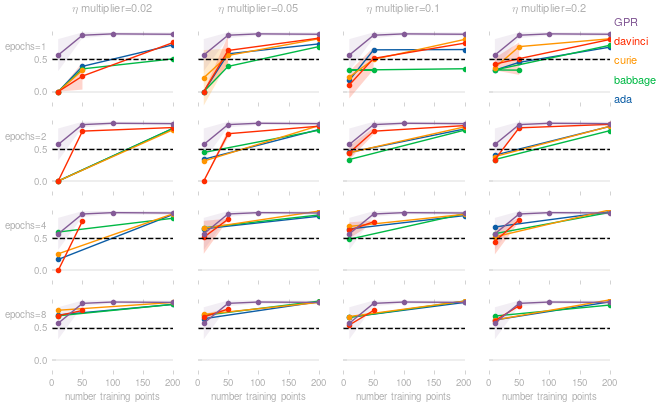

In [35]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4,4, figsize=(TWO_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all', sharey='all')

    # plot learning curves (with errorband) for each combination of learning_rate_multiplier and n_epochs
    # n_epochs in the rows, learning_rate_multiplier in the columns

    num_epochs = [1, 2, 4, 8]
    learning_rate_multipliers = [0.02, 0.05, 0.1, 0.2]
    base_models = ['ada', 'babbage', 'curie', 'davinci']
    for i, n_epochs in enumerate(num_epochs):
        for j, learning_rate_multiplier in enumerate(learning_rate_multipliers):
            for model in base_models:
                try:
                    ax[i,j].plot(
                        grouped.loc[model, :, n_epochs, learning_rate_multiplier].index,
                        grouped.loc[model, :, n_epochs, learning_rate_multiplier][('f1_macro', 'mean')],
                        label=model,
                        marker='o'
                    )

                    # try to plot errorband
                    try: 
                        std = grouped.loc[model, :, n_epochs, learning_rate_multiplier][('f1_macro', 'std')]
                        ax[i,j].fill_between(
                            grouped.loc[model, :, n_epochs, learning_rate_multiplier].index,
                            grouped.loc[model, :, n_epochs, learning_rate_multiplier][('f1_macro', 'mean')] - std,
                            grouped.loc[model, :, n_epochs, learning_rate_multiplier][('f1_macro', 'mean')] + std,
                            alpha=0.2,
                        )
                    except Exception as e:
                        print(e)
                except Exception as e:
                    print(e)
                
            ax[i,j].hlines(0.5, 0, 200, label="random", linestyle='--', color='k')
            # plot GPR baseline 
            ax[i,j].plot(gpr_baseline.index, gpr_baseline[('f1_macro', 'mean')], label="GPR", marker='o')
            ax[i,j].fill_between(
                gpr_baseline.index,
                gpr_baseline[('f1_macro', 'mean')] - gpr_baseline[('f1_macro', 'std')],
                gpr_baseline[('f1_macro', 'mean')] + gpr_baseline[('f1_macro', 'std')],
                alpha=.1
            )

    # label the top row with teh lr_multipliers
    for j, learning_rate_multiplier in enumerate(learning_rate_multipliers):
        ax[0,j].set_title(fr"$\eta$ multiplier={learning_rate_multiplier}", y=0.5, fontsize=8)
        ax[-1, j].set_xlabel("number training points", labelpad=4)

    # label the first column with the n_epochs
    for j, n_epochs in enumerate(num_epochs):
        matplotx.ylabel_top(f"epochs={n_epochs}", ax=ax[j,0])

    matplotx.line_labels(ax=ax[0,-1], fontsize=8)

    #fig.tit("F$_1$ macro scores (100 test points, GPT-3 fine tuned on SMILES)")

    fig.savefig('tuning_parameter_influence.pdf', bbox_inches='tight')